In [1]:
import wave

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from scipy.io.wavfile import write

In [21]:
spf=wave.open('helloworld.wav','r')

In [22]:
signal=spf.readframes(-1)

In [23]:
s=np.frombuffer(signal,np.int16)

In [24]:
s

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int16)

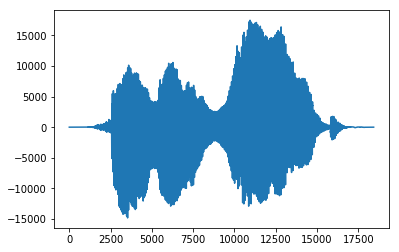

In [25]:
plt.plot(s)

In [30]:
delta=np.array([1.,0.,0.])

In [31]:
noecho=np.convolve(s,delta)

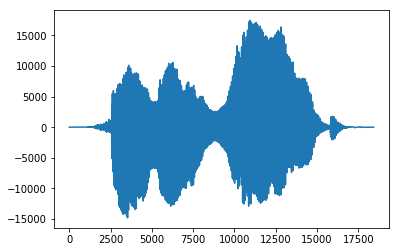

In [32]:
plt.plot(noecho)

In [33]:
noecho.shape

(18434,)

In [34]:
s.shape

(18432,)

In [40]:
(noecho[:len(s)]==s).sum()==len(s)

True

In [42]:
noecho=noecho.astype(np.int16)

In [44]:
write('noecho.wav',data=noecho,rate=16000)

In [45]:
 # create a filter for echo

In [46]:
filt=np.zeros(16000)

In [53]:
filt[0]=1
filt[4000]=0.7
filt[7000]=0.5
filt[9000]=0.4
filt[11000]=0.3
filt[15999]=0.05

In [54]:
echo=np.convolve(s,filt)

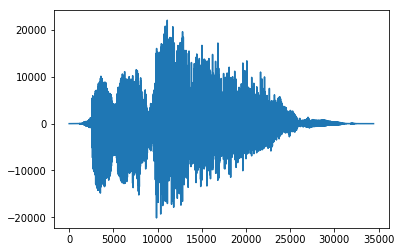

In [55]:
plt.plot(echo)

In [56]:
echo=echo.astype(np.int16)

In [57]:
write('echo.wav',rate=16000,data=echo)